In [1]:
client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


SyntaxError: invalid character in identifier (<ipython-input-1-a492615249f3>, line 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import variation
from statistics import stdev
from statistics import mean

In [2]:
# Importing the 2 csv files
client_df = pd.read_csv("client_data.csv")
price_df = pd.read_csv("price_data.csv")

Lets explore the **Client Data** first

In [3]:
client_df.shape

(14606, 26)

In [4]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

***

### Exploratory Data Analysis

**Lets look at each Variable from client_df and try to understand the dataframe**

#### id

id = client company identifier

**Does each row in client_df represents a unique company?**

In [5]:
print("Each row in Client data is of a unique company:", client_df.id.nunique() == client_df.shape[0])

Each row in Client data is of a unique company: True


💡Each row in id column is unique

#### channel_sales

channel_sales = code of the sales channel

In [6]:
client_df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

💡There are **3725 missing values** in channel_sales columns 

#### origin_up

origin_up = code of the electricity campaign the customer first subscribed to

In [7]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

💡There are **64 missing values** in origin_up column 

####  High level understanding of the numerical columns

#### All the numerical columns and their description is given below:

- cons_12m = electricity consumption of the past 12 months<br>
- cons_gas_12m = gas consumption of the past 12 months<br>
- cons_last_month = electricity consumption of the last month
- forecast_cons_12m = forecasted electricity consumption for next 12 months
- forecast_cons_year = forecasted electricity consumption for the next calendar year
- forecast_discount_energy = forecasted value of current discount
- forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
- forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
- forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
- forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
- imp_cons = current paid consumption
- margin_gross_pow_ele = gross margin on power subscription
- margin_net_pow_ele = net margin on power subscription
- nb_prod_act = number of active products and services
- net_margin = total net margin
- num_years_antig = antiquity of the client (in number of years)
- pow_max = subscribed power
- churn = has the client churned over the next 3 months

**Plotting the numerical variables on histograms to compare --> -->**

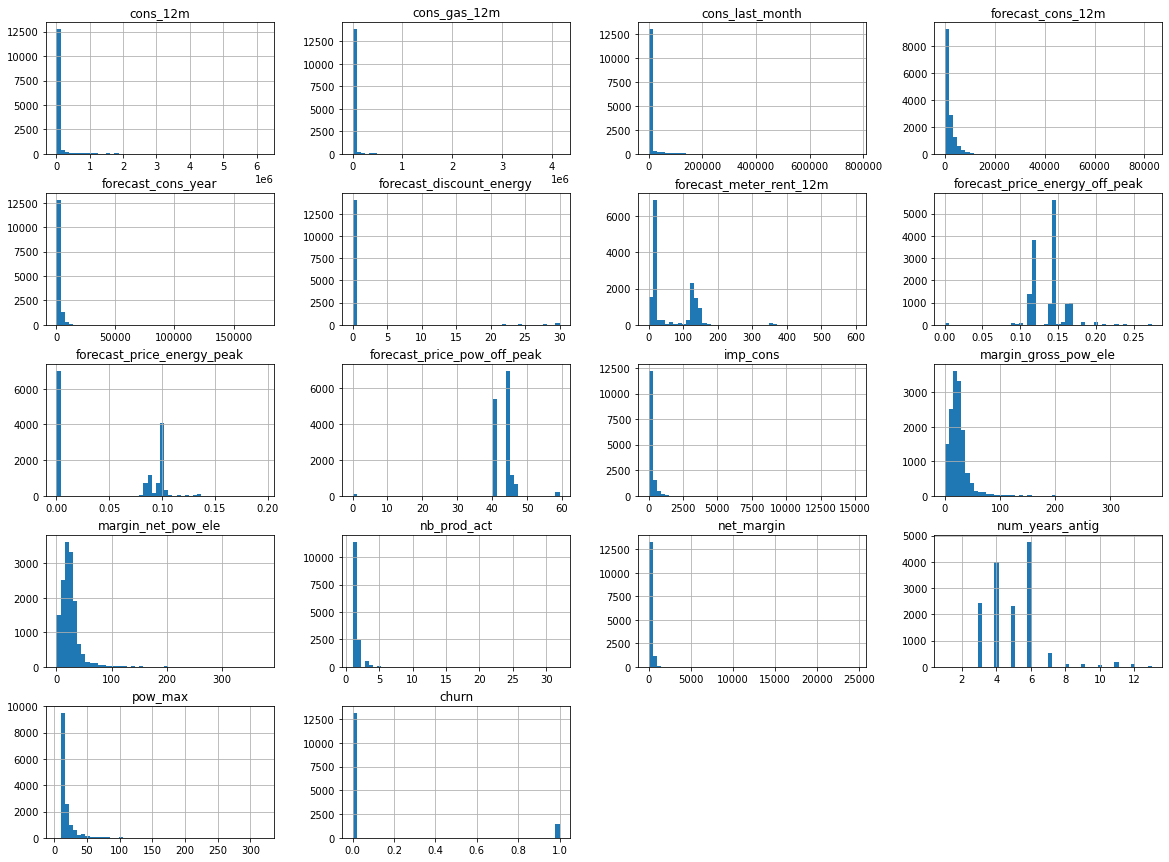

In [8]:
client_df.hist(bins=50, figsize=(20,15))
plt.show()

➡️ It is clear from the above plots that most of the variables has **outliers** or extreme values

#### Creating a funtion that calculates the coefficient of variation

In [9]:
def coef_variation(data):
    num_client_data = data.select_dtypes(include=['int64','float64'])
    coef_var = []
    for column in num_client_data.columns:
        c = variation(num_client_data[column],axis=0)
        coef_var.append(c)
    coef_var = pd.DataFrame(coef_var, index=num_client_data.columns)
    coef_var = coef_var.transpose()
    return coef_var

**Coefficient of Variation of all the numerical columns**

In [10]:
coef_variation(client_df)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,3.601586,5.801129,4.000057,1.277679,2.320161,5.283931,1.048768,0.179352,0.971164,0.104007,2.234208,0.823545,0.823596,0.549195,1.647363,0.32248,0.746302,3.048469


In [11]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


- The very high max values in the consumption columns are quite evident
- The real consumption vary greatly from the forecasted consumption but they follow the trend for the quartile ranges

__Converting the Date columns' datatype from object to datetime__

In [12]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end'] = pd.to_datetime(client_df['date_end'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])

#### Description of all the Datetime columns
- date_activ = date of activation of the contract
- date_end = registered date of the end of the contract
- date_modif_prod = date of the last modification of the product
- date_renewal = date of the next contract renewal

**Creating a new dataframe with only the datetime variables**

In [13]:
date_df = client_df.iloc[:,5:9]

#### Creating new columns with just the year data

In [14]:
def year_from_date(data):
    for column in data.columns:
        data[column+'_year'] = data[column].dt.year
    return data.head()

In [15]:
# Creating year columns for the existing columns
year_from_date(date_df)

,date_activ,date_end,date_modif_prod,date_renewal,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,2013,2016,2015,2015
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2009,2016,2009,2015
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17,2010,2016,2010,2015
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2010,2016,2010,2015
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2010,2016,2010,2015


In [16]:
date_df.drop(date_df[['date_activ','date_end','date_modif_prod','date_renewal']],axis=1, inplace=True)

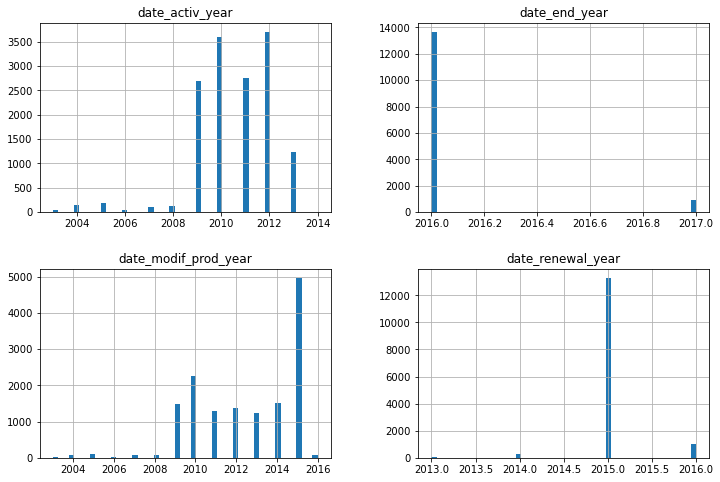

In [17]:
date_df.hist(bins=50, figsize=(12,8))
plt.show()

- new connections have been activated mostly between 2009 to 2013 and same goes for date of last modification which indicates that not many customers have modified their contract since the start
- registered date of end of contract is mostly in 2016 which will give the customers an opportunity to switch their electricity and power supplier. The company has to act accordingly to retain the customers before 2016
- 2015 indicates that majority of customers renewed their services in 2015 which means that the company has successfully retained a major portion of their customers

#### has_gas

has_gas = indicated if client is also a gas client

In [18]:
x = [(client_df.has_gas.value_counts(normalize=True)[1]*100), (client_df.has_gas.value_counts(normalize=True)[0]*100)]

**Creating a pie chart that shows the percentage of customers that has gas along with power**

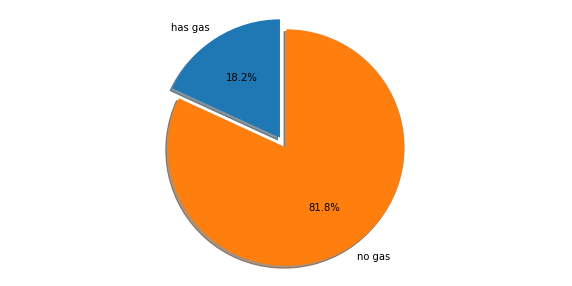

In [19]:
labels = 'has gas', 'no gas'
sizes = x
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

💡More than 80 % of the customers have not subscribed to gas

#### churn

churn = has the client churned over the next 3 months

In [20]:
x = [(client_df.churn.value_counts()[0]), (client_df.churn.value_counts()[1])]

**Creating a piechart of percentage of customers who have churned and not churned**

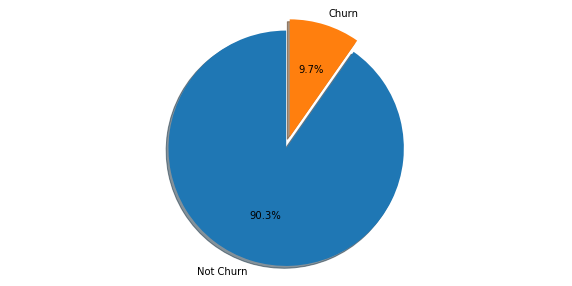

In [21]:
labels = 'Not Churn', 'Churn'
sizes = x
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Lets look at each Variable from price_df and try to understand the dataframe**

#### id

id = client company identifier

In [33]:
price_df.id.value_counts()

6ad53d7d8e889ac5ab882d8b9ee31c64    12
07b42ce214cc7831f38c5f3db93dc0a9    12
d00c79188d6d8d89fa3ac9d926c403b7    12
f735940ca90e6ba0f3fdd2773a6e0ec7    12
a5dc466885f694819a19af12e60ec141    12
                                    ..
3e459d61dc831e29f8a9a9a59f95efd2     8
83cf18b07114e495ae8b7fb235e45ee2     8
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
c5dcd5c506e565aaabffa29bc1ec0a37     7
Name: id, Length: 16096, dtype: int64

id as given in the description is the company identifier
If the number of times an id is repeated in the id column is counted, it ideally should be 12 (1 for each month) but some ids are repeated only 7 or 8 times which indicates that those companies have churned.

**Hypothesis:
Companies with fewer than 12 counts of their id in the dataset have churned** ❓

In [53]:
id_below_12 = []
for i in range(0,price_df.id.nunique()):
    if (price_df.id.value_counts().values[i] < 12):
        x = price_df.id.value_counts().index[i]
        id_below_12.append(x)

SyntaxError: 'return' outside function (<ipython-input-53-6f14f729cdc1>, line 6)

In [104]:
client_df[client_df.id.isin(id_below_12) == True].churn

287      0
290      0
361      1
494      0
774      0
        ..
13741    0
13810    0
14343    0
14416    0
14507    0
Name: churn, Length: 88, dtype: int64

💡 **The Hypothesis is wrong** - id which is repeated less than 12 times (once per month) does not mean that
corresponding customers have churned

#### price_date

In [ ]:
price_date = reference date

In [110]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

**Converting price_data column to datetime**

In [112]:
price_df['price_date'] =  pd.to_datetime(price_df['price_date'])

In [115]:
price_df['price_date'].dt.year.value_counts()

2015    193002
Name: price_date, dtype: int64

As discussed earlier **price_df** dataframe has data of prices for just 1 year that is **2015**

In [123]:
variance_coef = coef_variation(price_df)
(variance_coef)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0.1775,0.913853,1.190251,0.124849,1.208888,1.212729


In [124]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Visualizing all the numerical columns in price_df

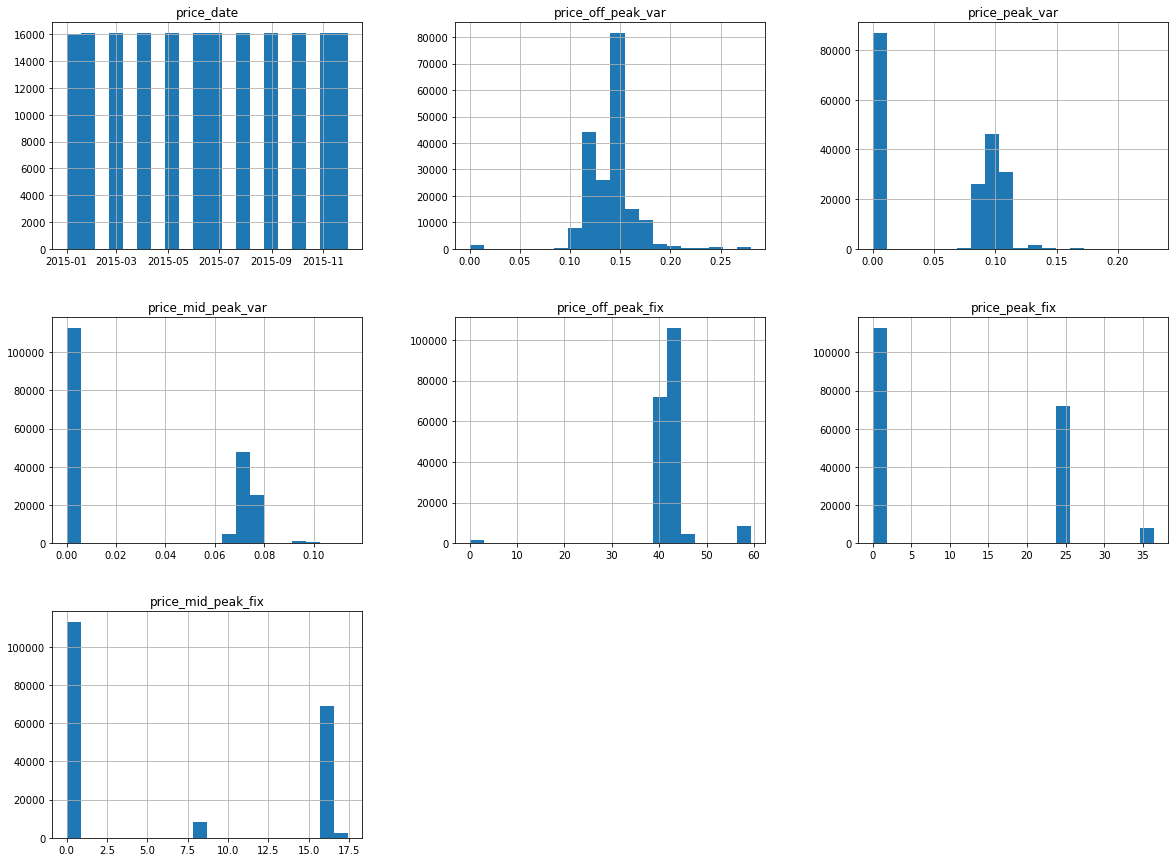

In [122]:
price_df.hist(bins=20, figsize=(20,15))
plt.show()

- The histograms about off peak prices of enegry and power are similar to a normally distributed graph
- The peak and mid-peak graphs shows that many companies choose not to operate during peak and mid-peak times in order to keep their expenses low
- Those companies that chose to operate during peak and mid-peak times are charged about half as the off peak time indicating that peak duration is almost half as the off peak and similar to mid peak duration.

### Sub-Task 2:

**Verify the hypothesis of price sensitivity being to some extent correlated with churn.** It is up to you to define price sensitivity and calculate it.

**<i>Assuming that the Price Sensitivity is the difference between the highest price and the lowest price<i>**

In [131]:
# Using the code below, a new dataframe that has the price sensitivity data was created and saved as dif_in_price
"""
energy_off_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_off_peak_var'])
    y = min(price_df[price_df['id'] == i]['price_off_peak_var'])
    c = x-y
    energy_off_peak.append(c)

energy_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_peak_var'])
    y = min(price_df[price_df['id'] == i]['price_peak_var'])
    c = x-y
    energy_peak.append(c)

energy_mid_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_mid_peak_var'])
    y = min(price_df[price_df['id'] == i]['price_mid_peak_var'])
    c = x-y
    energy_mid_peak.append(c)

power_off_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_off_peak_fix'])
    y = min(price_df[price_df['id'] == i]['price_off_peak_fix'])
    c = x-y
    power_off_peak.append(c)

power_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_peak_fix'])
    y = min(price_df[price_df['id'] == i]['price_peak_fix'])
    c = x-y
    power_peak.append(c)

power_mid_peak = []
for i in (price_df['id'].unique()):
    x = max(price_df[price_df['id'] == i]['price_off_peak_fix'])
    y = min(price_df[price_df['id'] == i]['price_off_peak_fix'])
    c = x-y
    power_mid_peak.append(c)
"""
# dif_in_price = pd.DataFrame({'energy_off_peak':energy_off_peak, 'energy_peak':energy_peak, 'energy_mid_peak':energy_mid_peak, 'power_off_peak':power_off_peak, 'power_peak':power_peak, 'power_mid_peak':power_mid_peak })


"\nenergy_off_peak = []\nfor i in (price_df['id'].unique()):\n    x = max(price_df[price_df['id'] == i]['price_off_peak_var'])\n    y = min(price_df[price_df['id'] == i]['price_off_peak_var'])\n    c = x-y\n    energy_off_peak.append(c)\n\nenergy_peak = []\nfor i in (price_df['id'].unique()):\n    x = max(price_df[price_df['id'] == i]['price_peak_var'])\n    y = min(price_df[price_df['id'] == i]['price_peak_var'])\n    c = x-y\n    energy_peak.append(c)\n\nenergy_mid_peak = []\nfor i in (price_df['id'].unique()):\n    x = max(price_df[price_df['id'] == i]['price_mid_peak_var'])\n    y = min(price_df[price_df['id'] == i]['price_mid_peak_var'])\n    c = x-y\n    energy_mid_peak.append(c)\n\npower_off_peak = []\nfor i in (price_df['id'].unique()):\n    x = max(price_df[price_df['id'] == i]['price_off_peak_fix'])\n    y = min(price_df[price_df['id'] == i]['price_off_peak_fix'])\n    c = x-y\n    power_off_peak.append(c)\n\npower_peak = []\nfor i in (price_df['id'].unique()):\n    x = max(p

**Importing the price sensitivity dataframe which was created using the code block above**

In [132]:
dif_price = pd.read_csv('dif_in_price.csv')

**Since the price sensitivity table was created using .unique(), we could add the corresponding id from the price_df using the same**<br>💡This matches the company with its price sensitivity

In [133]:
dif_price['id'] = price_df.id.unique()

In [134]:
dif_price.head()

,energy_off_peak,energy_peak,energy_mid_peak,power_off_peak,power_peak,power_mid_peak,id
0,0.005508,0.000000,0.000000,0.177780,0.000000,0.177780,038af19179925da21a25619c5a24b745
1,0.008161,0.004169,0.004775,0.162916,0.097749,0.162916,31f2ce549924679a3cbb2d128ae9ea43
2,0.010018,0.005120,0.000763,0.162916,0.097752,0.162916,36b6352b4656216bfdb96f01e9a94b4e
3,0.004462,0.000000,0.000000,0.177779,0.000000,0.177779,48f3e6e86f7a8656b2c6b6ce2763055e
4,0.041649,0.035524,0.031459,0.497997,0.498003,0.497997,cce88c7d721430d8bd31f71ae686c91e


💡**By searching each id of price sensitivity table (dif_price) in client_df table, respective churn status (0 or 1) can be extracted**

In [135]:
client_info = client_df[['id','churn']]

**Creating a new_df with all the information about price sensitivity**

In [136]:
new_df = pd.merge(dif_price, client_info)

In [137]:
new_df.head()

,energy_off_peak,energy_peak,energy_mid_peak,power_off_peak,power_peak,power_mid_peak,id,churn
0,0.005508,0.000000,0.000000,0.177780,0.000000,0.177780,038af19179925da21a25619c5a24b745,0
1,0.008161,0.004169,0.004775,0.162916,0.097749,0.162916,31f2ce549924679a3cbb2d128ae9ea43,0
2,0.004462,0.000000,0.000000,0.177779,0.000000,0.177779,48f3e6e86f7a8656b2c6b6ce2763055e,0
3,0.010116,0.005220,0.003041,0.162916,0.097752,0.162916,7363a2ebfbb3148c8ef6d25323e4093a,1
4,0.006029,0.085483,0.000000,0.177780,0.000000,0.177780,ef716222bbd97a8bdfcbb831e3575560,0


In [141]:
new_df.churn.value_counts(normalize=True).values

array([0.90284814, 0.09715186])

**Visualizing the churn percentage**

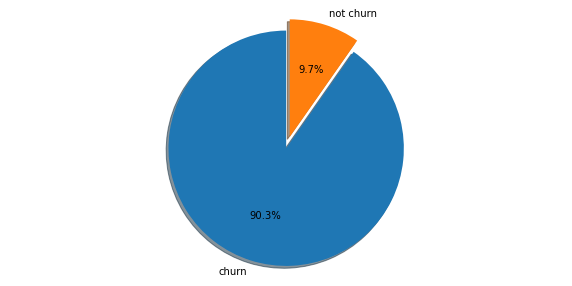

In [142]:
labels = 'churn', 'not churn'
sizes = new_df.churn.value_counts(normalize=True).values
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

- This is the same visualization about churn percentage that was done earlier proving that the dataframe has no errors

In [144]:
new_df[new_df['churn'] == 1].describe()

,energy_off_peak,energy_peak,energy_mid_peak,power_off_peak,power_peak,power_mid_peak,churn
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.0
mean,0.010811,0.007932,0.004177,0.661855,0.995162,0.661855,1.0
std,0.015928,0.019433,0.014349,3.125191,4.848009,3.125191,0.0
min,0.001547,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.004547,0.000000,0.000000,0.000004,0.000000,0.000004,1.0
50%,0.008161,0.004152,0.000000,0.162916,0.000000,0.162916,1.0
75%,0.009328,0.004739,0.002831,0.177780,0.097749,0.177780,1.0
max,0.153838,0.137497,0.098101,59.173468,36.490689,59.173468,1.0


In [145]:
new_df[new_df['churn'] == 0].describe()

,energy_off_peak,energy_peak,energy_mid_peak,power_off_peak,power_peak,power_mid_peak,churn
count,13187.000000,13187.000000,13187.000000,13187.000000,13187.000000,13187.000000,13187.0
mean,0.009333,0.007065,0.003195,0.495773,0.761835,0.495773,0.0
std,0.012911,0.018925,0.012816,2.243976,4.192457,2.243976,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.004462,0.000000,0.000000,0.000004,0.000000,0.000004,0.0
50%,0.006875,0.002405,0.000000,0.177779,0.000000,0.177779,0.0
75%,0.008502,0.004169,0.002107,0.177780,0.097749,0.177780,0.0
max,0.236095,0.152042,0.114102,44.444710,36.490689,44.444710,0.0


In [146]:
churn = []
not_churn = []
for column in (new_df.columns[0:6].tolist()):
    x = mean(new_df[new_df['churn'] == 1][column])
    y = mean(new_df[new_df['churn'] == 0][column])
    churn.append(x)
    not_churn.append(y)

In [147]:
churn[0:3]

[0.010811374319943567, 0.007932315715292437, 0.004177298801973197]

In [148]:
(new_df.columns[0:6].tolist())

['energy_off_peak',
 'energy_peak',
 'energy_mid_peak',
 'power_off_peak',
 'power_peak',
 'power_mid_peak']

#### Comparing the churn customers vs. the not churn customers using Grouped bar graph for energy consumption

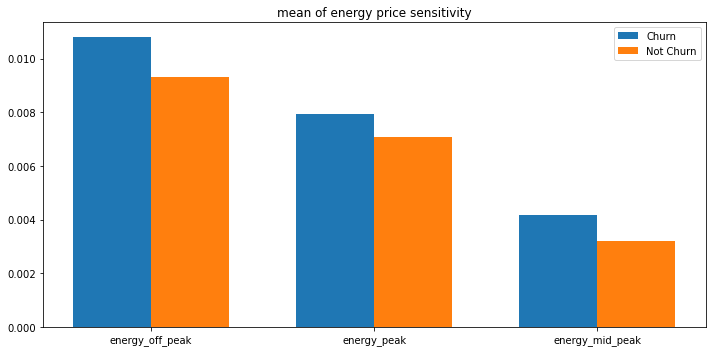

In [163]:
labels = ['energy_off_peak', 'energy_peak', 'energy_mid_peak']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width/2, churn[0:3], width, label='Churn')
rects2 = ax.bar(x + width/2, not_churn[0:3], width, label='Not Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('mean of energy price sensitivity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
# plt.savefig('mean_energy_pricesens.jpg')

#### Comparing the churn customers vs. the not churn customers using Grouped bar graph for power consumption

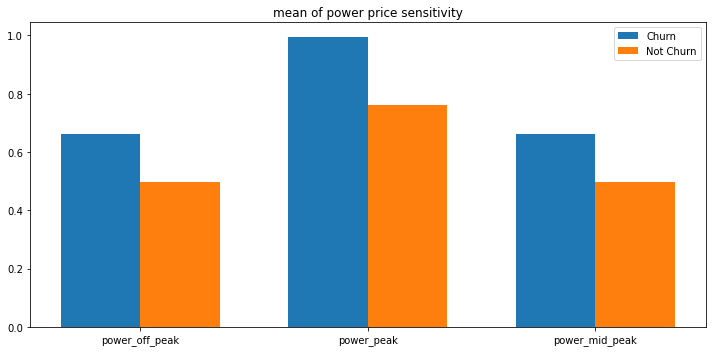

In [164]:
labels = ['power_off_peak', 'power_peak', 'power_mid_peak']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,5))
rects1 = ax.bar(x - width/2, churn[3:6], width, label='Churn')
rects2 = ax.bar(x + width/2, not_churn[3:6], width, label='Not Churn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('mean of power price sensitivity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
# plt.savefig("mean_power_pricesens.jpg")

💡**Both the graphs prove that the price sensitivity is affecting customer churn**